# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.282932e+01     1.329758e+01
 * time: 0.004317045211791992
     1     6.210433e+01     1.171523e+01
 * time: 0.012585878372192383
     2     5.576095e+01     1.577849e+01
 * time: 0.0322110652923584
     3     4.128133e+01     1.230342e+01
 * time: 0.06056499481201172
     4     3.227734e+01     1.015370e+01
 * time: 0.21955084800720215
     5     1.376353e+01     3.270407e+00
 * time: 0.24884390830993652
     6     9.154325e+00     2.832572e+00
 * time: 0.2715599536895752
     7     8.013404e+00     2.040478e+00
 * time: 0.293550968170166
     8     8.006234e+00     4.832281e+00
 * time: 0.31058192253112793
     9     7.515162e+00     3.721704e+00
 * time: 0.33087801933288574
    10     7.110695e+00     3.517290e+00
 * time: 0.35140299797058105
    11     6.736151e+00     3.020978e+00
 * time: 0.3785550594329834
    12     6.477753e+00     2.412220e+00
 * time: 0.40195202827453613
    13     6.244191e+00     1.659245e+00
 * time: 0.

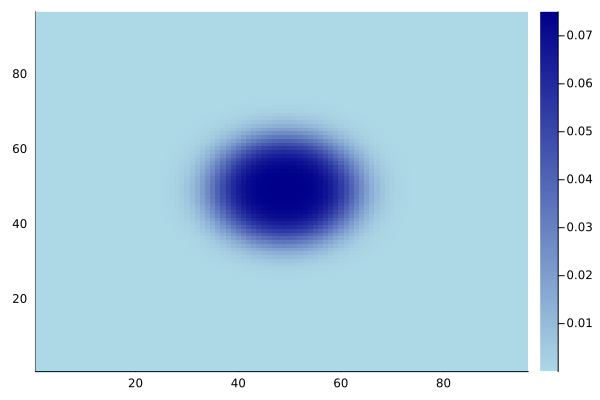

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)